<a href="https://colab.research.google.com/github/iniparhan/Diabetes_Analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: `Analisis Faktor Diabetes`

## Pertanyaan

**Pertanyaan Analisis:**

1. **Apakah terdapat hubungan antara usia (Age) dan kemungkinan menderita diabetes (Outcome)?**
2. **Apakah kadar glukosa (Glucose) merupakan faktor penentu utama terhadap Outcome (hasil diabetes)?**
3. **Seberapa besar pengaruh BMI terhadap Outcome pada pasien dalam dataset ini?**
4. **Apakah pasien dengan jumlah kehamilan (Pregnancies) yang lebih banyak cenderung memiliki risiko lebih tinggi terkena diabetes?**
5. **Apakah nilai Diabetes Pedigree Function (DPF) yang tinggi berkorelasi dengan Outcome positif (mengidap diabetes)?**

**Pertanyaan Perbandingan:**

6. **Bagaimana perbandingan rata-rata nilai Glucose antara pasien dengan Outcome = 1 dan Outcome = 0?**
7. **Apakah terdapat perbedaan signifikan pada nilai BMI atau Diabetes Pedigree Function antara pasien yang mengidap diabetes dan yang tidak?**

**Pertanyaan Deteksi Pola:**

8. **Apakah terdapat kombinasi pola tertentu dari nilai Glucose, BMI, dan Age yang sering muncul pada pasien dengan Outcome = 1 (positif diabetes)?**

**Pertanyaan Prediktif (untuk Machine Learning):**

9. **Dapatkah kita membangun model prediksi Outcome (0 atau 1) berdasarkan fitur: Pregnancies, Glucose, BMI, Diabetes Pedigree Function, dan Age?**



## Import Library

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import joblib
warnings.filterwarnings('ignore')

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

## Data Wrangling

### Gathering Data

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
data_path = os.listdir('/content/drive/MyDrive/Colab Notebooks/Diabetes_Analysis')
data_path

['diabetes_data.csv', 'notebook.ipynb']

### Assessing Data

#### Sample Data

In [225]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes_Analysis/diabetes_data.csv')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
725,4,112,78,40,0,39.4,0.236,38,0
330,8,118,72,19,0,23.1,1.476,46,0
281,10,129,76,28,122,35.9,0.280,39,0
177,0,129,110,46,130,67.1,0.319,26,1
65,5,99,74,27,0,29.0,0.203,32,0
156,2,99,52,15,94,24.6,0.637,21,0
253,0,86,68,32,0,35.8,0.238,25,0
25,10,125,70,26,115,31.1,0.205,41,1
659,3,80,82,31,70,34.2,1.292,27,1
630,7,114,64,0,0,27.4,0.732,34,1


#### Data Info

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [227]:
print(f'DATA INFO\n')
print(f'Data Shape : {data.shape}')
print(f'Data Null : {data.isnull().sum().sum()}')
print(f'Data Duplicate : {data.duplicated().sum()}')

DATA INFO

Data Shape : (768, 9)
Data Null : 0
Data Duplicate : 0


#### Data Description

In [228]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Cleaning Data

#### Mengatur kolom DiabetesPedigreeFunction

In [229]:
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].apply(lambda x: 1 if x > 1 else x)

## Exploratory Data Analysis (EDA)

### Heatmap

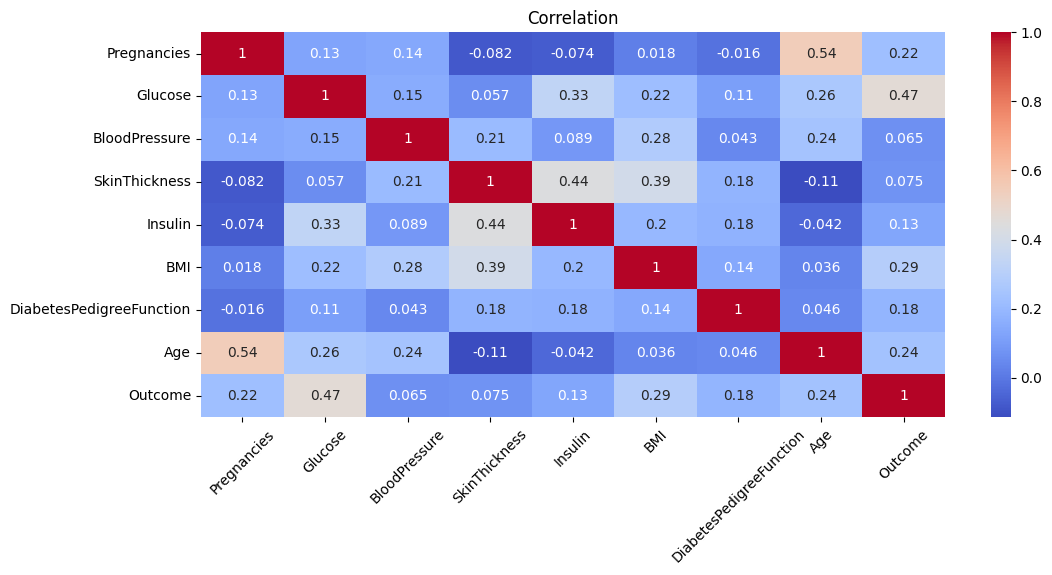

In [230]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation')
plt.show()

### Choose High Outcome Correlation

In [231]:
data = data.drop(['BloodPressure', 'SkinThickness', 'Insulin'], axis=1)

### Pairplot

<Figure size 2000x2000 with 0 Axes>

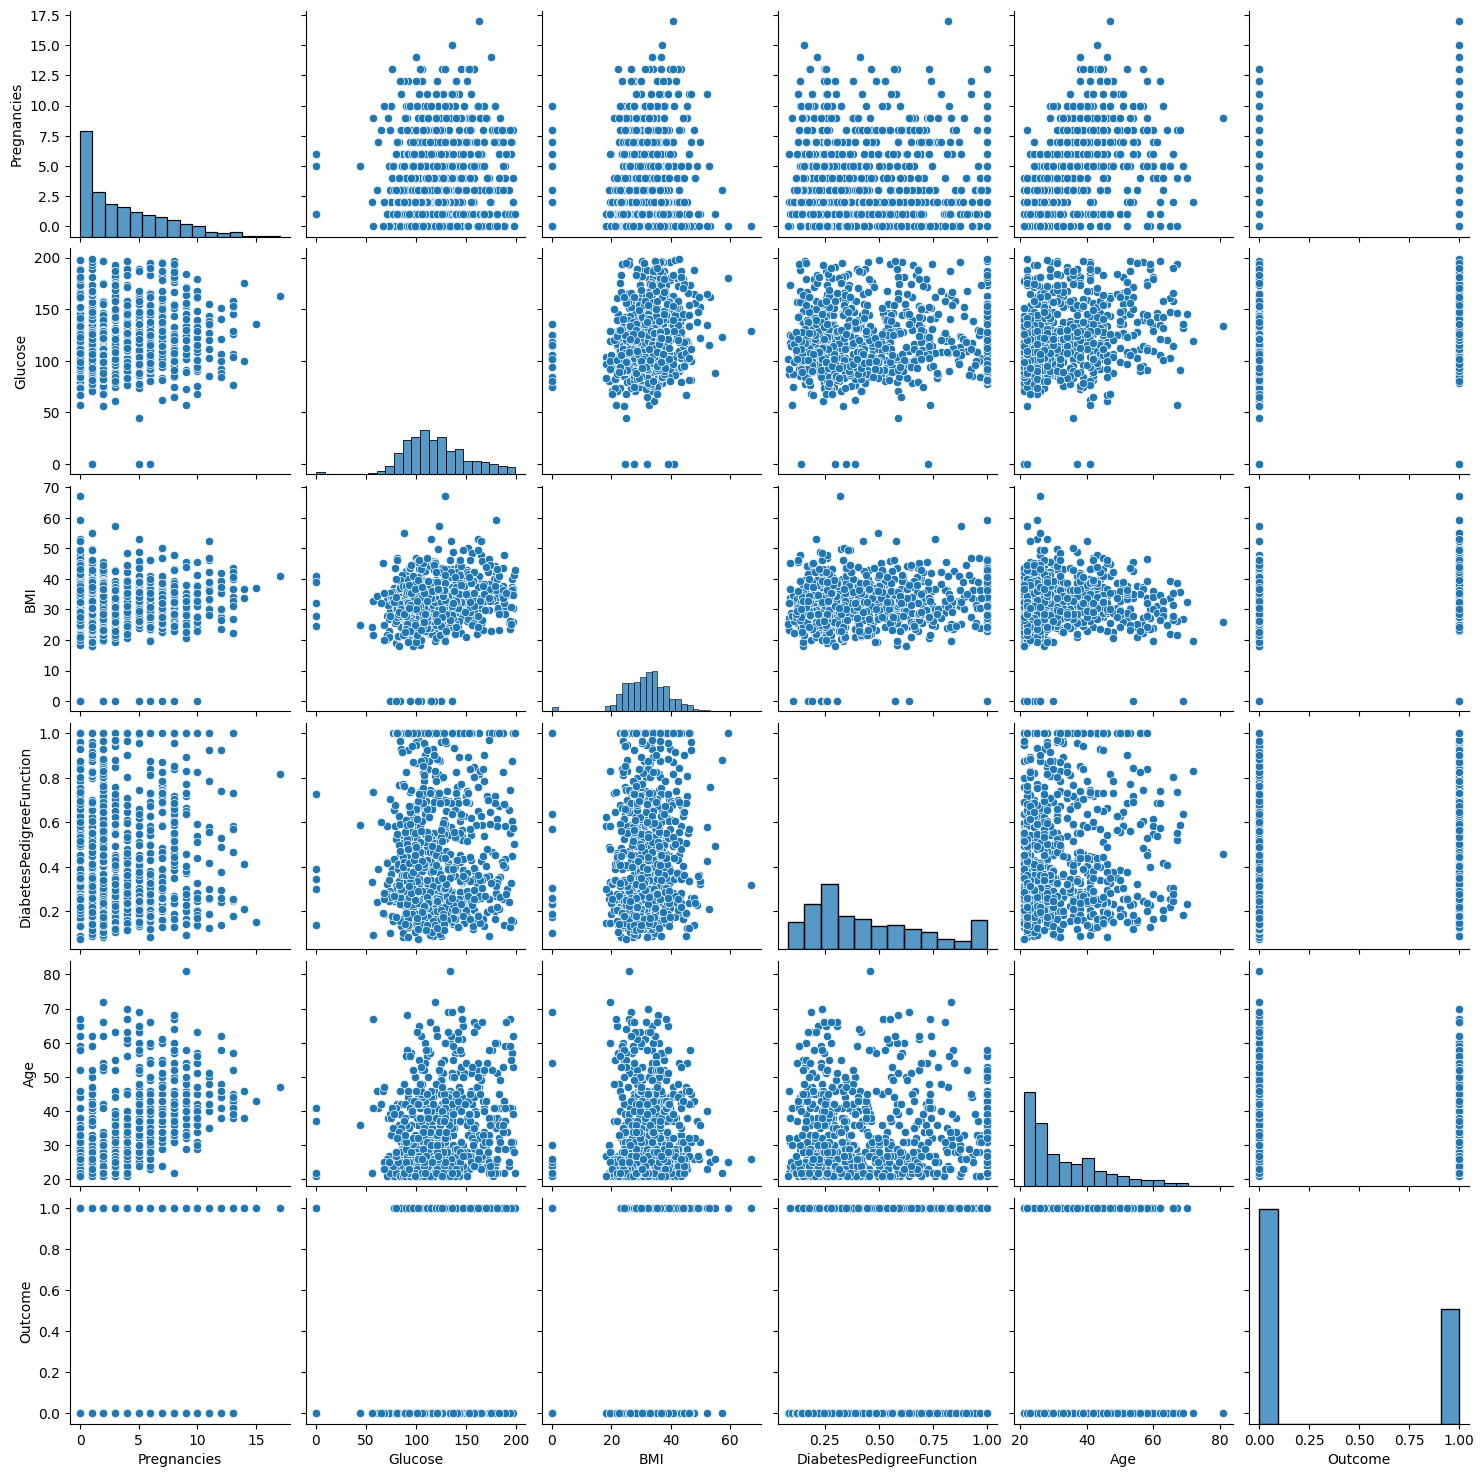

In [232]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data)

### KDE Plot All Column

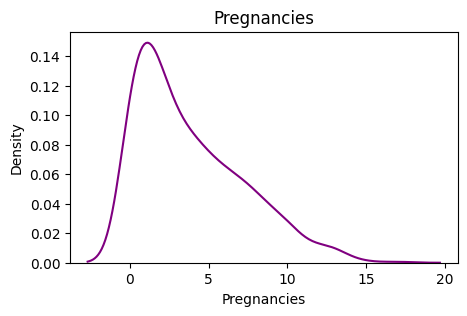

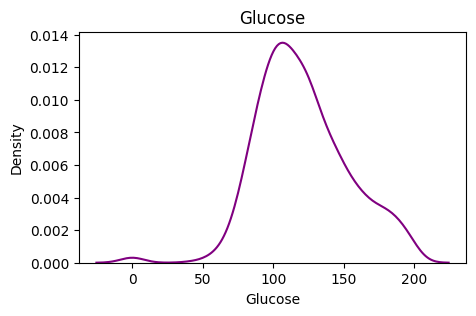

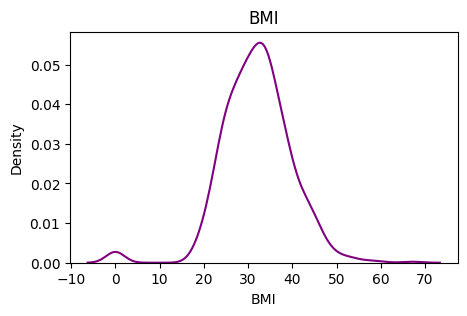

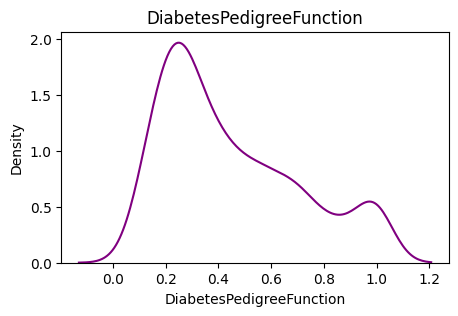

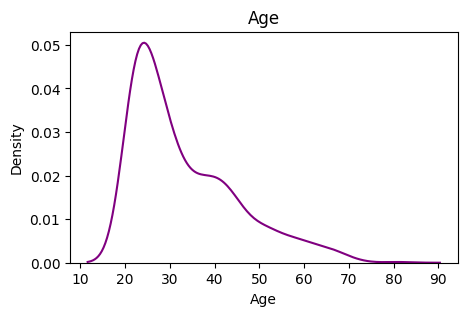

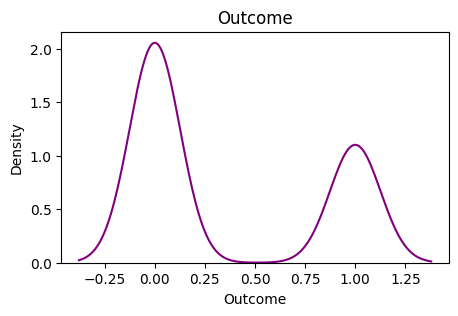

In [233]:
column_list = data.columns.to_list()

for col in column_list:
  plt.figure(figsize=(5,3))
  plt.title(col)
  sns.kdeplot(data=data, x=col, color='purple')
  plt.show()

### Histplot All Column

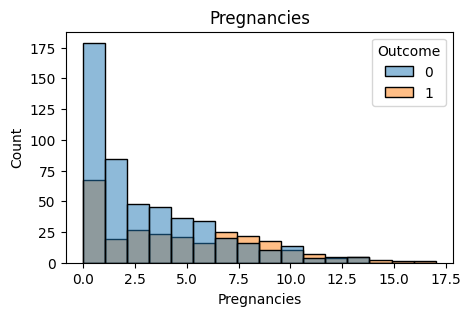

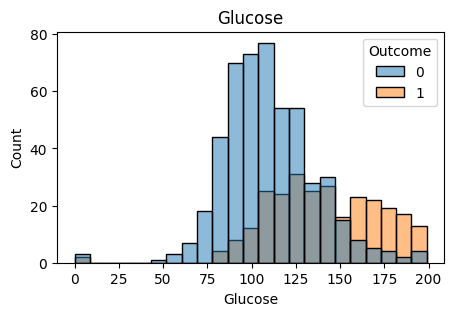

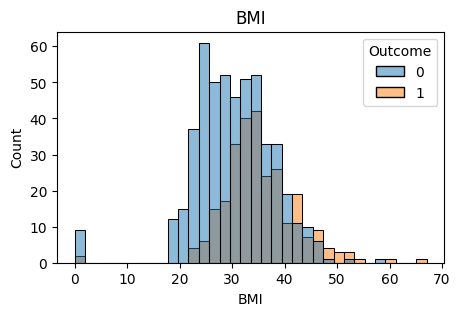

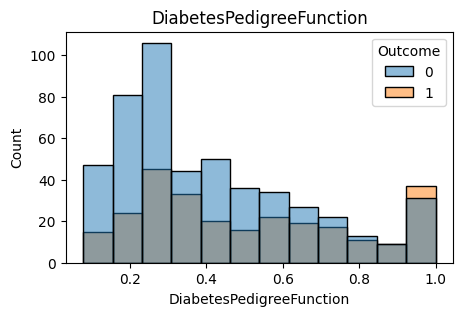

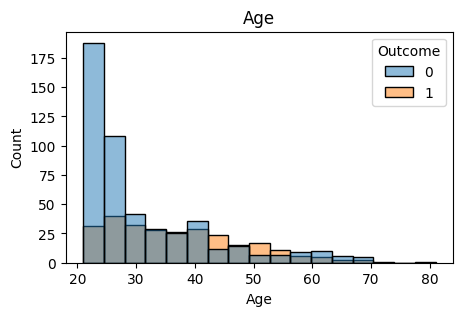

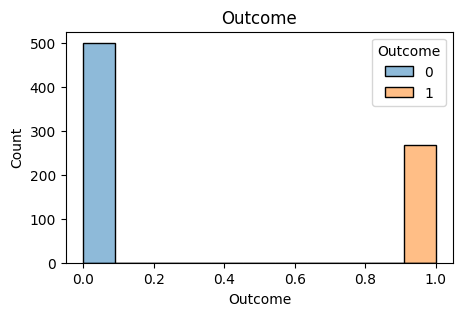

In [234]:
column_list = data.columns.to_list()

for col in column_list:
  plt.figure(figsize=(5,3))
  plt.title(col)
  sns.histplot(data=data, x=col, hue='Outcome', color='purple')
  plt.show()

### Boxplot All Column

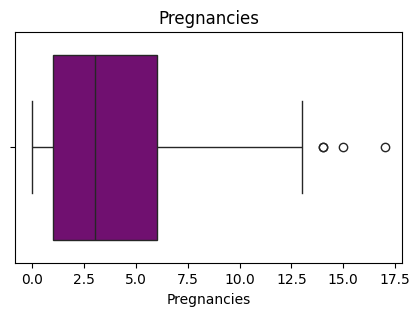

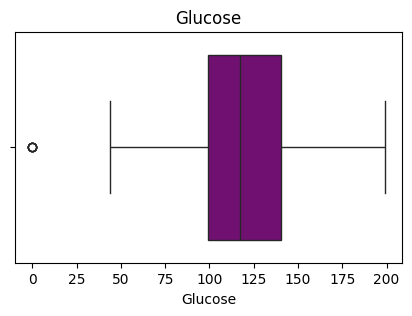

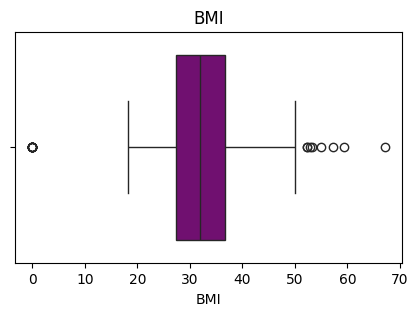

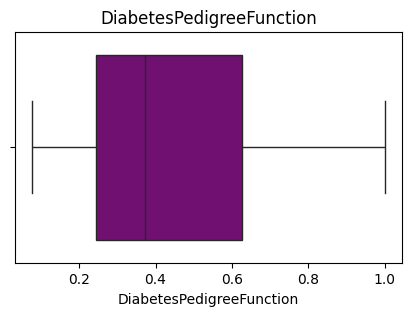

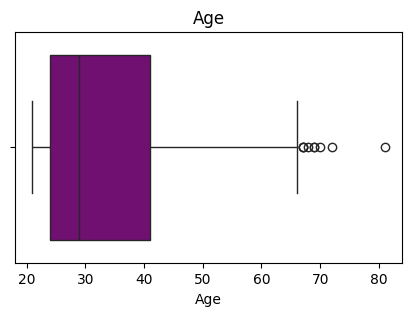

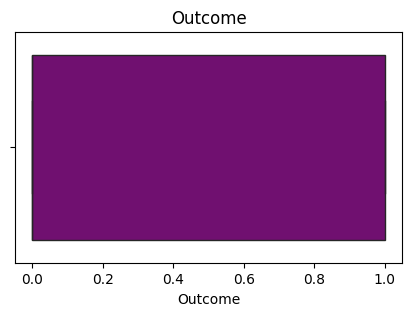

In [235]:
column_list = data.columns.to_list()

for col in column_list:
  plt.figure(figsize=(5,3))
  plt.title(col)
  sns.boxplot(data=data, x=col, color='purple')
  plt.show()

### "Outcome" Value

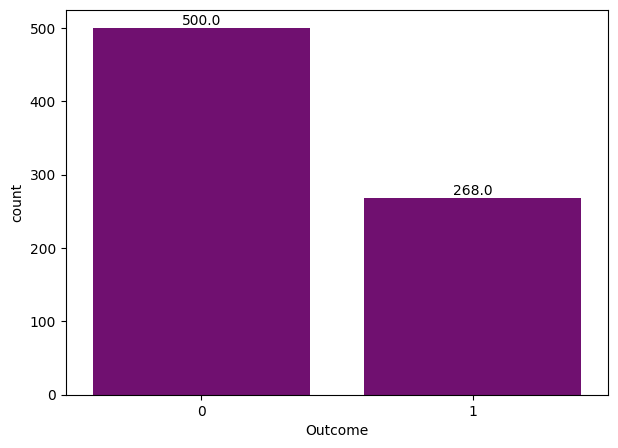

In [236]:
plt.figure(figsize=(7,5))

# Create countplot
ax = sns.countplot(data=data, x='Outcome', color='purple')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

### Cleaning Data 2

#### Fungsi Cek Outlier

In [237]:
def check_outlier(data, column):

  Q1 = np.percentile(data[column], 25)
  Q3 = np.percentile(data[column], 75)
  IQR = Q3 - Q1

  min_whisker = Q1 - 1.5 * IQR
  max_whisker = Q3 + 1.5 * IQR

  return min_whisker, max_whisker

#### Buat DataFrame total Outlier

In [238]:
# Pregnancies
min_pregnancies, max_pregnancies = check_outlier(data, 'Pregnancies')
sum_outlier_pregnancies = sum((data['Pregnancies'] < min_pregnancies) | (data['Pregnancies'] > max_pregnancies))

# Glucose
min_glucose, max_glucose = check_outlier(data, 'Glucose')
sum_outlier_glucose = sum((data['Glucose'] < min_glucose) | (data['Glucose'] > max_glucose))

# BMI
min_bmi, max_bmi = check_outlier(data, 'BMI')
sum_outlier_bmi = sum((data['BMI'] < min_bmi) | (data['BMI'] > max_bmi))

# Age
min_age, max_age = check_outlier(data, 'Age')
sum_outlier_age = sum((data['Age'] < min_age) | (data['Age'] > max_age))

# Data Frame
outlier_data = pd.DataFrame({'Column': ['Pregnancies', 'Glucose', 'BMI', 'Age'],
                              'Min': [min_pregnancies, min_glucose, min_bmi, min_age],
                              'Max': [max_pregnancies, max_glucose, max_bmi, max_age],
                              'Count (Outlier)': [sum_outlier_pregnancies, sum_outlier_glucose, sum_outlier_bmi, sum_outlier_age]},
                              columns=['Column', 'Min', 'Max', 'Count (Outlier)'])

outlier_data

,Column,Min,Max,Count (Outlier)
0,Pregnancies,-6.500,13.500,4
1,Glucose,37.125,202.125,5
2,BMI,13.350,50.550,19
3,Age,-1.500,66.500,9


#### Hapus total Outlier yang ada

In [239]:
# Salin dataframe agar data aslinya tidak terpengaruh
cleaned_data = data.copy()

# Hapus outlier pada masing-masing kolom
columns_to_check = ['Pregnancies', 'Glucose', 'BMI', 'Age']

for column in columns_to_check:
    min_val, max_val = check_outlier(cleaned_data, column)
    cleaned_data = cleaned_data[(cleaned_data[column] >= min_val) & (cleaned_data[column] <= max_val)]

print(f"Jumlah data sebelum: {data.shape[0]}")
print(f"Jumlah data sesudah: {cleaned_data.shape[0]}")
print(f"Jumlah data yang dihapus: {data.shape[0] - cleaned_data.shape[0]}")

data = cleaned_data

Jumlah data sebelum: 768
Jumlah data sesudah: 732
Jumlah data yang dihapus: 36


#### Boxplot All Column (For cleaning check)

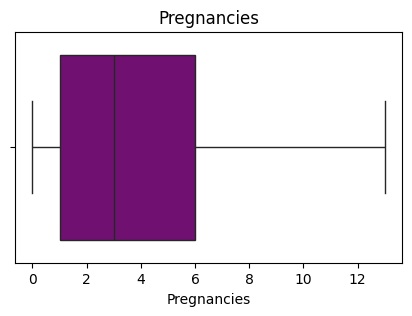

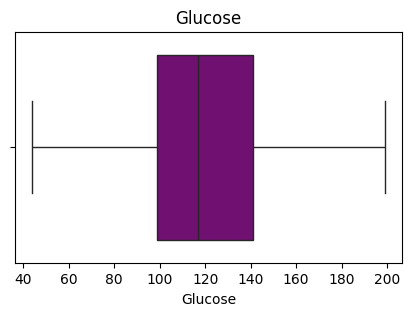

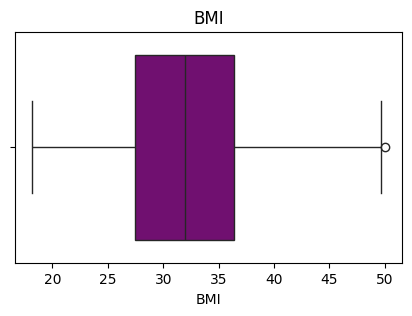

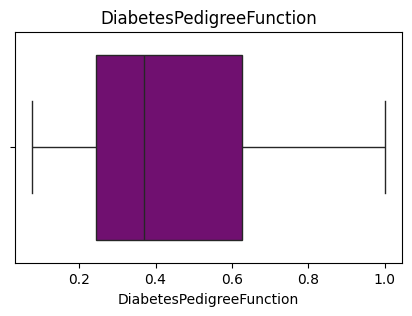

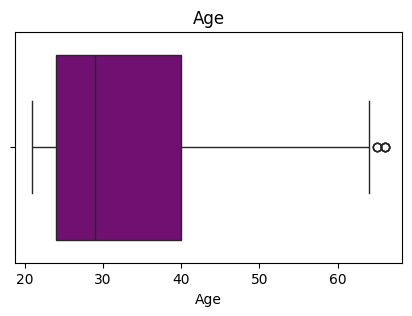

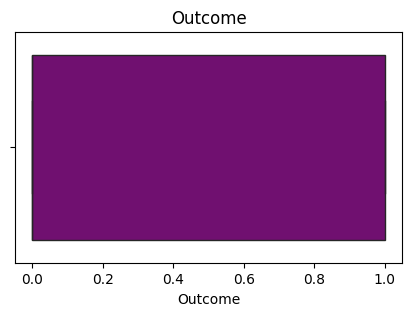

In [240]:
column_list = data.columns.to_list()

for col in column_list:
  plt.figure(figsize=(5,3))
  plt.title(col)
  sns.boxplot(data=data, x=col, color='purple')
  plt.show()

### Perbandingan Usia dengan Diabetes

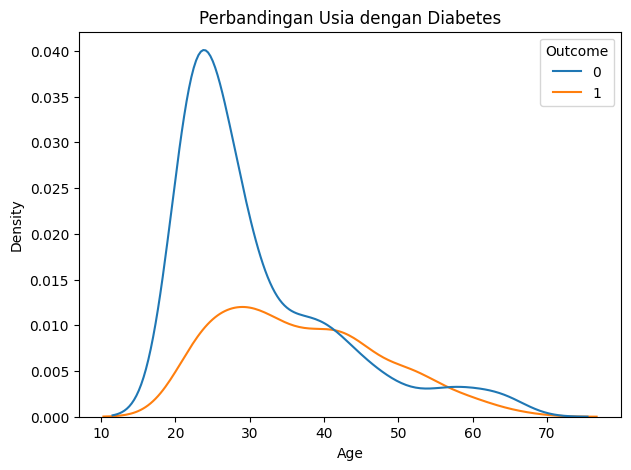

In [241]:
plt.figure(figsize=(7,5))
plt.title('Perbandingan Usia dengan Diabetes')
sns.kdeplot(data=data, x='Age', hue='Outcome', color='blue')
plt.show()

### Perbandingan Usia dengan Jumlah Glukosa

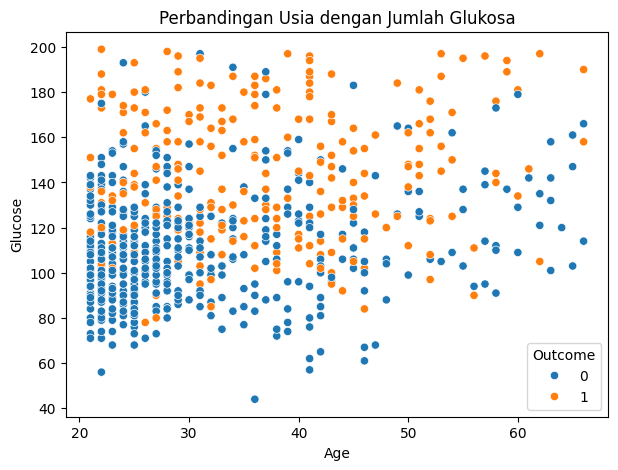

In [242]:
plt.figure(figsize=(7,5))
plt.title('Perbandingan Usia dengan Jumlah Glukosa')
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome', color='blue')
plt.show()

## Visualization & Explanatory Analysis

## Analisis Lanjutan (Data Modelling)

In [243]:
data_modelling = data.copy()

#### Cek distribusi Banyaknya Pengidap Diabetes

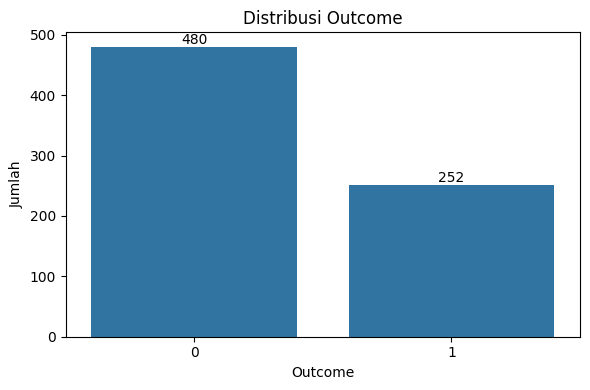

In [244]:
# Plot countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data_modelling, x='Outcome')

# Tambahkan label jumlah di atas bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',              # teks label
                (p.get_x() + p.get_width() / 2, count),  # posisi
                ha='center', va='bottom', fontsize=10, fontweight=None)

plt.title('Distribusi Outcome')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

#### Separate features dan target

In [245]:
X = data_modelling.drop('Outcome', axis=1, errors='ignore')
y = data_modelling['Outcome']

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")


Final feature matrix shape: (732, 5)
Target variable shape: (732,)
Class distribution: {0: 480, 1: 252}


#### Resampled Data

In [246]:
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

print(f"Resampled feature matrix shape: {X_resampled.shape}")
print(f"Resampled target variable shape: {y_resampled.shape}")

Resampled feature matrix shape: (514, 5)
Resampled target variable shape: (514,)


#### Cek data setelah resampled

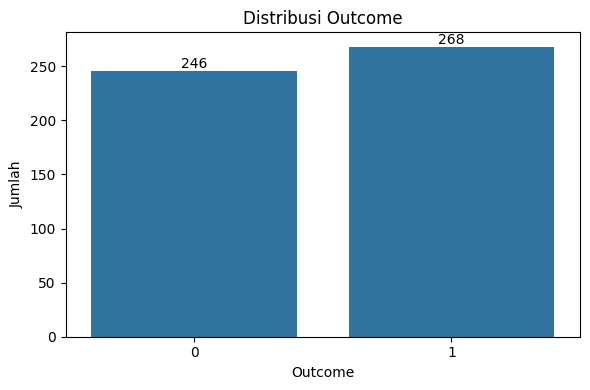

In [247]:
# Plot countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x=y_resampled)

# Tambahkan label jumlah di atas bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',              # teks label
                (p.get_x() + p.get_width() / 2, count),  # posisi
                ha='center', va='bottom', fontsize=10, fontweight=None)

plt.title('Distribusi Outcome')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

#### Set train dan test

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_resampled)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')
print(f"\nScaler saved in {os.getcwd()} directory.")
print("Features scaled successfully!")

Training set: (411, 5)
Test set: (103, 5)

Scaler saved in /content directory.
Features scaled successfully!


#### Run models

In [249]:
models = {

    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

model_results = {}

for name, model in models.items():

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [r['accuracy'] for r in model_results.values()],
    'Precision': [r['precision'] for r in model_results.values()],
    'Recall': [r['recall'] for r in model_results.values()],
    'F1-Score': [r['f1'] for r in model_results.values()],
    'ROC-AUC': [r['roc_auc'] for r in model_results.values()]
})

print("\nModel Performance Comparison:")
print(comparison_df.round(4))

best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Best ROC-AUC Score: {comparison_df['ROC-AUC'].max():.4f}")


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.9223     0.9107  0.9444    0.9273   0.9743
1        Random Forest    0.9612     0.9310  1.0000    0.9643   0.9692
2    Gradient Boosting    0.9417     0.9000  1.0000    0.9474   0.9684
3              XGBoost    0.9417     0.9000  1.0000    0.9474   0.9660
4       Neural Network    0.9515     0.9153  1.0000    0.9558   0.9837
5                  SVM    0.9515     0.9153  1.0000    0.9558   0.9698
6  K-Nearest Neighbors    0.9223     0.9259  0.9259    0.9259   0.9509

Best Model: Neural Network
Best ROC-AUC Score: 0.9837


#### Cek Confussion Matrix

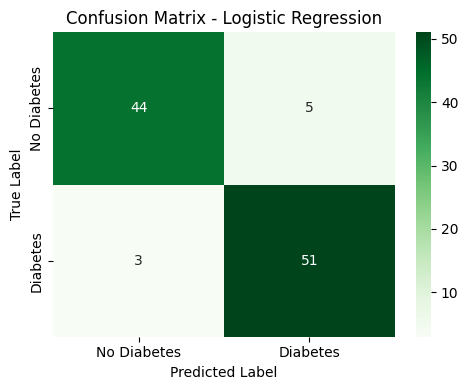

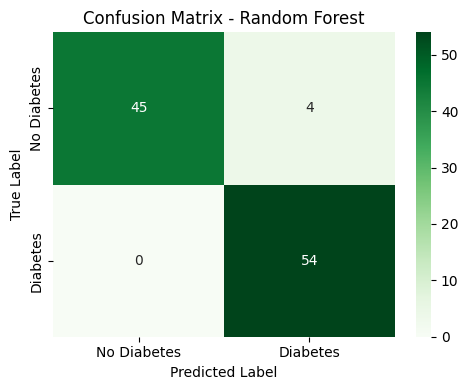

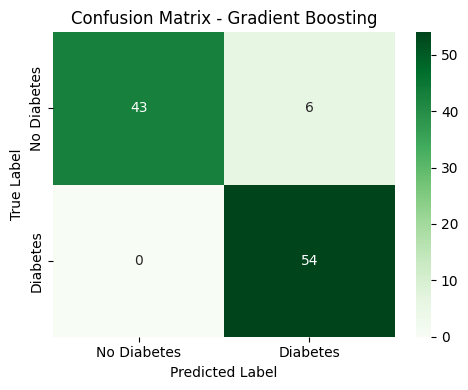

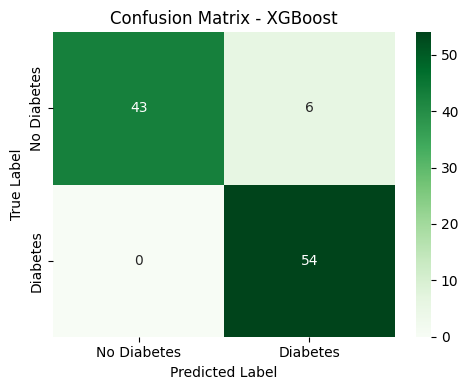

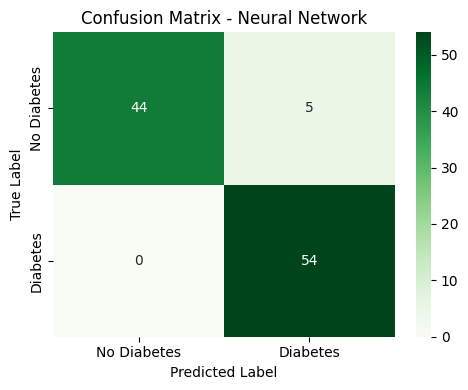

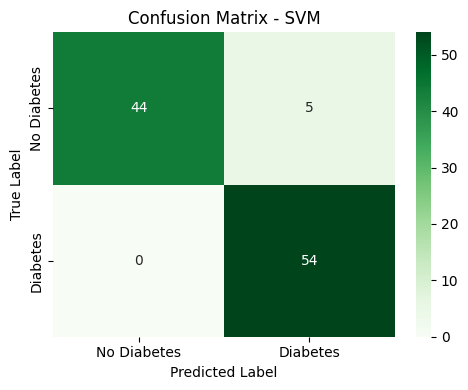

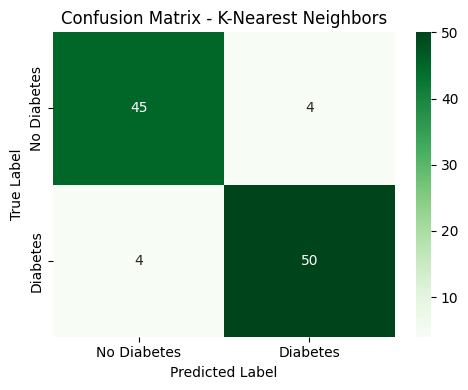

In [250]:
for name, result in model_results.items():
    model = result['model']
    y_pred = model.predict(X_test_scaled)
    confussion_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(confussion_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


#### Evaluasi Model

Tuning: Logistic Regression
Tuning: Random Forest


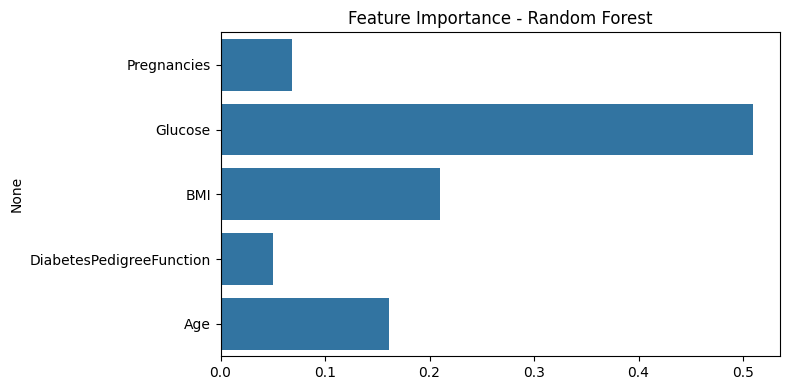

Tuning: Gradient Boosting


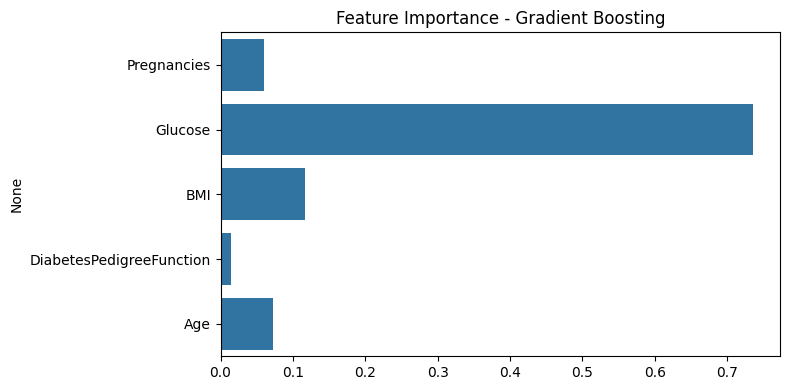

Tuning: XGBoost


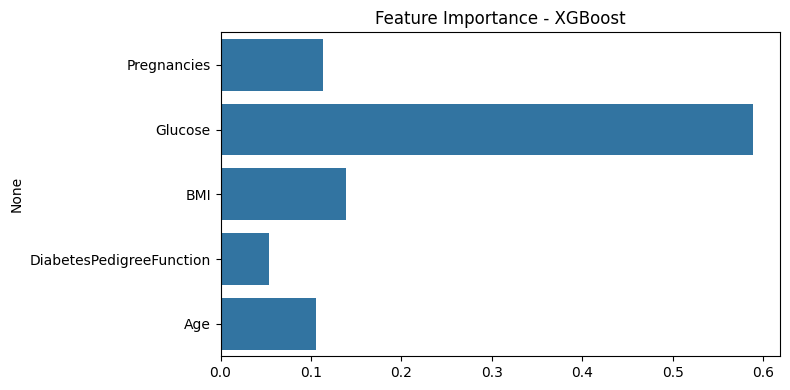

Tuning: Neural Network
Tuning: SVM
Tuning: K-Nearest Neighbors


In [251]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'alpha': [0.0001, 0.001]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7]
    }
}

# Untuk evaluasi semua model
results = {}

for name, model in models.items():
    print(f"Tuning: {name}")

    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    # Simpan hasil evaluasi
    results[name] = {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Model': best_model
    }

    # Tampilkan feature importance jika tersedia
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feat_names = X_train.columns if hasattr(X_train, 'columns') else [f'feat_{i}' for i in range(len(importances))]
        plt.figure(figsize=(8, 4))
        sns.barplot(x=importances, y=feat_names)
        plt.title(f'Feature Importance - {name}')
        plt.tight_layout()
        plt.show()

#### Save Best Model

In [252]:
model = best_model

joblib.dump(model, 'diabetes_model.pkl')

print(f"Models saved in {os.getcwd()} directory.")

Models saved in /content directory.


## Coba hasil train

In [253]:
data_train = data.copy()

random_data = data_train.sample(1)

X = random_data.drop('Outcome', axis=1)

X_scaled = scaler.transform(X)
result = model.predict(X_scaled)

X = X.to_dict(orient='records')[0]
print(X)

print(f'\nHasil prediksi: {result[0]}')
print(f'Data Asli: {random_data["Outcome"].iloc[0]}\n')

# Tampilkan hasil prediksi
if result[0] == 1:
    print('Pasien terprediksi mengidap diabetes. ⚠')
else:
    print('Pasien tidak terindikasi diabetes. ✅')

{'Pregnancies': 9, 'Glucose': 91, 'BMI': 24.2, 'DiabetesPedigreeFunction': 0.2, 'Age': 58}

Hasil prediksi: 0
Data Asli: 0

Pasien tidak terindikasi diabetes. ✅


## Conclusion